In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("Timeseries.csv")
df.dtypes

Date      object
Value    float64
dtype: object

In [4]:
df.head()

Date     Value
0  01-07-1991  3.526591
1  01-08-1991  3.180891
2  01-09-1991  3.252221
3  01-10-1991  3.611003
4  01-11-1991  3.565869

In [5]:
#To change datatype from object to datetime in Date column in given 
#dataframe , use inbuit method to_datetime of pandas library
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [8]:
df.head(20)  #yyyy-dd-mm

Date     Value
0  1991-01-07  3.526591
1  1991-01-08  3.180891
2  1991-01-09  3.252221
3  1991-01-10  3.611003
4  1991-01-11  3.565869
5  1991-01-12  4.306371
6  1992-01-01  5.088335
7  1992-01-02  2.814520
8  1992-01-03  2.985811
9  1992-01-04  3.204780
10 1992-01-05  3.127578
11 1992-01-06  3.270523
12 1992-01-07  3.737851
13 1992-01-08  3.558776
14 1992-01-09  3.777202
15 1992-01-10  3.924490
16 1992-01-11  4.386531
17 1992-01-12  5.810549
18 1993-01-01  6.192068
19 1993-01-02  3.450857

In [10]:
#given data is month wise 
df['Date'].min() ,df['Date'].max()

(Timestamp('1991-01-07 00:00:00'), Timestamp('2008-01-06 00:00:00'))

In [12]:
#give data is month wise and sales data of company
df['Date'].describe()

count                     204
unique                    204
top       1991-01-07 00:00:00
freq                        1
first     1991-01-07 00:00:00
last      2008-01-06 00:00:00
Name: Date, dtype: object

In [13]:
df.head()

Date     Value
0 1991-01-07  3.526591
1 1991-01-08  3.180891
2 1991-01-09  3.252221
3 1991-01-10  3.611003
4 1991-01-11  3.565869

In [14]:
#set Date column in index , use inbuilt method set_index('colname')
df=df.set_index('Date')
df.head()

Value
Date                
1991-01-07  3.526591
1991-01-08  3.180891
1991-01-09  3.252221
1991-01-10  3.611003
1991-01-11  3.565869

In [15]:
#To check null values
df.isnull().sum()

Value    0
dtype: int64

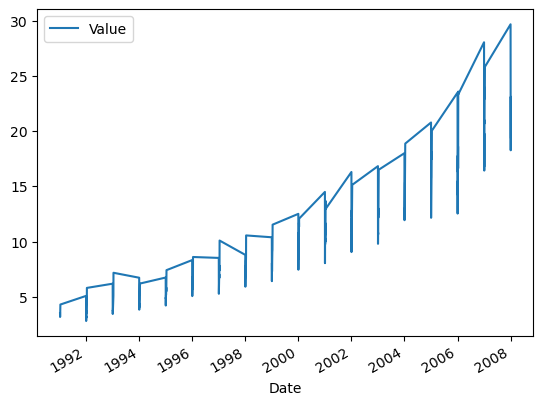

In [16]:
#visualise time series with the help of line plot
df.plot()
plt.show()

In [17]:
#clearly show , given time series data is non-stationary 
#check Given time series data is staionary or non-stationary :
#1. use ADFULLER method :  adfuller inbuilt class which define in stattools class -->tsa class
#--> statsmodels inbuilt package 
from statsmodels.tsa.stattools import adfuller

In [18]:
#create a function
def adf_test(X):   #adf_test() user defined function
    result=adfuller(X) #adfuller() inbuilt function which define in 
    #adfuller inbuilt  and result user variable
    print("ADF Statistics : %.2f" %result[0])  
    print("P-value : %.2f"%result[1])
    if result[1]<=0.05:
        print("Reject null hypothesis,Give Time series data is Stationary")
    else:
        print("""Fail to reject the null hypothesis,Give Time series data
        is not Stationary""")

In [19]:
#call in mian program
adf_test(df['Value'])

ADF Statistics : 3.15
P-value : 1.00
Fail to reject the null hypothesis,Give Time series data
        is not Stationary
